# Importing Libaries

In [1]:
## For Handling warnings 
import warnings
warnings.filterwarnings('ignore')

## standard libarary
import numpy as np
import pandas as pd


## For Visualization
import matplotlib.pyplot as plt
import seaborn as sng



In [2]:
## Read data set
data=pd.read_csv('laptop_data.csv')
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
## Find the shape of the data
data.shape

(1303, 12)

In [4]:
## Find the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
## We take only integer value of ram and change into integer type
data['Ram']=data['Ram'].str.replace('GB',' ')
data['Ram']=data['Ram'].astype(int)

In [6]:
## We take only integer value of Weight  and change into integer type
data['Weight']=data['Weight'].str.replace('kg',' ')
data['Weight']=data['Weight'].astype(float)

In [7]:
## Find the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price             1303 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 117.2+ KB


# ScreenResolution Column

In [8]:
## Find frequency of each item in ScreenResolution column
data['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [9]:
## split the ScreenResolution column and take the last entry and store name as new
new=data['ScreenResolution'].str.split().apply(lambda x:x[-1])

## Split the last entry of  ScreenResolution column
new=new.str.split('x')

## Creating list for storing x_resolution 
x_res=[]

## Creating list for storing y_resolution 
y_res=[]

## Here we append the x_resolution and y_resolution  in x_res and y-res list respectively
for i in range(len(data)):
      x_res.append(new[i][0])
      y_res.append(new[i][1])
    
## creating a new column in data set name as x_res    
data['x_res']=x_res
## Change the data type of x_res column in data set as integer
data['x_res']=data['x_res'].astype(int)

## creating a new column in data set name as y_res  
data['y_res']=y_res
## Change the data type of y_res column in data set as integer
data['y_res']=data['y_res'].astype(int)

In [10]:
## creating a new column in data set name as Full HD using Lambda function  
data['Full HD']=data['ScreenResolution'].apply(lambda x:1 if 'Full HD' in x else 0)

## creating a new column in data set name as IPS Panel using Lambda function 
data['IPS Panel']=data['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

## creating a new column in data set name as Touchscreen using Lambda function 
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

## creating a new column in data set name as Quad HD+ using Lambda function 
data['Quad HD+']=data['ScreenResolution'].apply(lambda x:1 if 'Quad HD+ ' in x else 0)

## creating a new column in data set name as 4K Ultra HD  using Lambda function 
data['4K Ultra HD']=data['ScreenResolution'].apply(lambda x:1 if '4K Ultra HD' in x else 0)

## creating a new column in data set name as Retina Display using Lambda function 
data['Retina Display']=data['ScreenResolution'].apply(lambda x:1 if 'Retina Display' in x else 0)

In [11]:
## Read the data set
data.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x_res,y_res,Full HD,IPS Panel,Touchscreen,Quad HD+,4K Ultra HD,Retina Display
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,0,1,0,0,0,1
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900,0,0,0,0,0,0
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080,1,0,0,0,0,0


In [12]:
## We drop the column ScreenResolution and Unnamed: 0 from data set
data.drop(columns=['ScreenResolution','Unnamed: 0'],axis=1,inplace=True)

# Memory Column

In [13]:
## Find frequency of each item in Memory column
data['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [14]:
## Read data set
data.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,x_res,y_res,Full HD,IPS Panel,Touchscreen,Quad HD+,4K Ultra HD,Retina Display
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,0,1,0,0,0,1
42,Asus,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce 940MX,Linux,2.30,27864.9072,1366,768,0,0,0,0,0,0
66,HP,Notebook,15.6,Intel Core i3 6006U 2GHz,4,500GB HDD,AMD Radeon 520,Windows 10,1.86,23373.4032,1366,768,0,0,0,0,0,0
641,HP,Notebook,17.0,AMD A9-Series 9420 3GHz,8,1TB HDD,AMD Radeon R5,Windows 10,2.60,27753.5520,1600,900,0,0,0,0,0,0
344,Dell,Ultrabook,13.3,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,84129.1200,1920,1080,1,0,0,0,0,0


In [15]:
## Split the Memory column with respect to + and store in name as new
new=data['Memory'].str.split('+')

## Read the ten sample 
new.sample(10)

1226             [256GB SSD]
97               [256GB SSD]
1139             [256GB SSD]
902              [256GB SSD]
441              [256GB SSD]
240              [128GB SSD]
162              [256GB SSD]
545              [128GB SSD]
690     [32GB Flash Storage]
297              [256GB SSD]
Name: Memory, dtype: object

In [16]:
## Creating two empty list two store first value and second value in fs and ls respectively.
fs=[]
ls=[]
for i in range(len(data)):
     fs.append(new[i][0])
    
     try:
       ls.append(new[i][1])   ##  Here we use try and pass because if noting present in second entery then append 0.
     except:
       ls.append('0') 
  

In [17]:
## Creating a new column name as First which store fs value
data['First']=fs

## Creating a new column name as Last which store ls value
data['Last']=ls


In [18]:
## Here we create a new column name as SSD_storage_GB_1 which store integral value of SSD in GB from Fisrt column entry.
data['SSD_storage_GB_1']=(((data['First'].apply(lambda x: x if 'GB SSD' in x else 0)).str.replace('GB SSD',' ')).fillna(0)).astype(int)

## Here we create a new column name as SSD_storage_TB_1 which store integral value of SSD in TB from Fisrt column entry.
data['SSD_storage_TB_1']=(((data['First'].apply(lambda x: x if 'TB SSD' in x else 0)).str.replace('TB SSD',' ')).fillna(0)).astype(int)

## Here we create a new column name as SSD_storage_GB_2 which store integral value of SSD in GB from Last column entry.
data['SSD_storage_GB_2']=(((data['Last'].apply(lambda x: x.strip(' ') if 'GB SSD' in x else '0')).str.replace('GB SSD',' ')).fillna(0)).astype(int)

## Here we create a new column name as SSD_storage_TB_2 which store integral value of SSD in TB from Last column entry.
data['SSD_storage_TB_2']=(((data['Last'].apply(lambda x: x.strip(' ') if 'TB SSD' in x else '0')).str.replace('TB SSD',' ')).fillna(0)).astype(int)

## Here we create a new column name as SSD_storage_GB which store integral value of SSD in GB  which is sum of value SSD_storage_GB_1 and SSD_storage_GB_2
data['SSD_storage_GB']=data['SSD_storage_GB_1']+data['SSD_storage_GB_2']

## Here we create a new column name as SSD_storage_TB which store integral value of SSD in TB  which is sum of value SSD_storage_TB_1 and SSD_storage_TB_2
data['SSD_storage_TB']=data['SSD_storage_TB_1']+data['SSD_storage_TB_2']




In [19]:
## Here we create a new column name as HDD_storage_GB_1 which store integral value of HDD in GB from Fisrt column entry.
data['HDD_storage_GB_1']=(((data['First'].apply(lambda x: x if 'GB HDD' in x else 0)).str.replace('GB HDD',' ')).fillna(0)).astype(int)

## Here we create a new column name as HDD_storage_TB_1 which store float value of HDD in TB from Fisrt column entry.
data['HDD_storage_TB_1']=(((data['First'].apply(lambda x: x if 'TB HDD' in x else 0)).str.replace('TB HDD',' ')).fillna(0)).astype(float)

## Here we create a new column name as HDD_storage_GB_2 which store integral value of HDD in GB from Last column entry.
data['HDD_storage_GB_2']=(((data['Last'].apply(lambda x: x.strip(' ') if 'GB HDD' in x else 0)).str.replace('GB HDD',' ')).fillna(0)).astype(int)

## Here we create a new column name as HDD_storage_TB_1 which store float value of HDD in TB from Last column entry.
data['HDD_storage_TB_2']=(((data['Last'].apply(lambda x: x.strip(' ') if 'TB HDD' in x else 0)).str.replace('TB HDD',' ')).fillna(0)).astype(float)


## Here we create a new column name as HDD_storage_GB which store float value of HDD in GB  which is sum of value HDD_storage_GB_1 and HDD_storage_GB_2
data['HDD_storage_GB']=data['HDD_storage_GB_1']+data['HDD_storage_GB_2']


## Here we create a new column name as HDD_storage_TB which store integral value of HDD in TB  which is sum of value HDD_storage_TB_1 and HDD_storage_TB_2
data['HDD_storage_TB']=data['HDD_storage_TB_1']+data['HDD_storage_TB_2']

In [20]:
## here we drop SSD_storage_TB_1 and SSD_torage_TB_2 and SSD_storage_GB_1 and SSD_storage_GB_2 and HDD_storage_TB_1 and HDD_storage_TB_2 and HDD_storage_GB_1 and HDD_storage_GB_2 columns
data=data.drop(columns=['SSD_storage_TB_1','SSD_storage_TB_2','SSD_storage_GB_1','SSD_storage_GB_2','HDD_storage_TB_1','HDD_storage_TB_2','HDD_storage_GB_1','HDD_storage_GB_2'])

In [21]:
## Here we create a new column name as Flash_storage_GB which store integral value of Flash_stroage in GB from Fisrt column entry.
data['Flash_Storage_GB']=((data['First'].apply(lambda x: x if 'GB Flash Storage' in x else 0)).str.replace('GB Flash Storage',' ')).fillna(0)



In [22]:
## Here we create a new column name as Flash_storage_TB which store integral value of Flash_stroage in GB from Fisrt column entry.
data['Flash_Storage_TB']=(data['First'].apply(lambda x: x if 'TB Flash Storage' in x else 0))

## Here we check frequency of different value in Flash_Storage_TB column
data['Flash_Storage_TB'].value_counts()

Flash_Storage_TB
0    1303
Name: count, dtype: int64

#### <font color='green'>Here we see only zero value is present in Flash_Storage_TB column in data set .Thus we drop this column.

In [23]:
## Here we drop Flash_Storage_TB column
data=data.drop(columns=['Flash_Storage_TB'])

In [24]:
## Here we create a new column name as Hybrid_storage_GB_1 which store integral value of Hybrid_stroage in GB from Fisrt column entry.
data['Hybrid_Storage_GB_1']=(((data['First'].apply(lambda x: x if 'GB Hybrid' in x else 0)).str.replace('GB Hybrid',' ')).fillna(0)).astype(int)

## Here we create a new column name as Hybrid_storage_TB_2 which store float value of Hybrid_stroage in GB from Fisrt column entry.
data['Hybrid_Storage_TB_1']=(((data['First'].apply(lambda x: x if 'TB Hybrid' in x else 0)).str.replace('TB Hybrid',' ')).fillna(0)).astype(float)




In [25]:
## Here we create a new column name as Hybrid_storage_GB_2 which store integral value of Hybrid_stroage in GB from Last column entry.
data['Hybrid_Storage_GB_2']=data['Last'].apply(lambda x: x.strip(' ') if 'GB Hybrid' in x else 0)

## Here we find frequency of each item in Hybrid_Storage_GB_2 column in data set
data['Hybrid_Storage_GB_2'].value_counts()

Hybrid_Storage_GB_2
0    1303
Name: count, dtype: int64

#### <font color='green'>Here we see only zero value is present in Hybrid_Storage_GB_2 column in data set .Thus we drop this column.

In [26]:
## Here we drop Hybrid_Storage_GB_2 column
data=data.drop(columns=['Hybrid_Storage_GB_2'])

In [27]:
## Here we create a new column name as Hybrid_storage_TB_2 which store float value of Hybrid_stroage in TB from Last column entry
data['Hybrid_Storage_TB_2']=(((data['Last'].apply(lambda x: x.strip(' ') if 'TB Hybrid' in x else 0)).str.replace('TB Hybrid',' ')).fillna(0)).astype(float)


## Here we create a new column name as Hybrid_storage_GB which store integral value of Hybrid_storage in GB  which is Hybrid_Storage_GB_1
data['Hybrid_Storage_GB']=data['Hybrid_Storage_GB_1']

## Here we create a new column name as Hybrid_storage_TB which store float value of Hybrid_stroage in TB  which is sum of value Hybrid_storage_TB_1 and Hybrid_storage_TB_2
data['Hybrid_Storage_TB']=data['Hybrid_Storage_TB_1']+data['Hybrid_Storage_TB_2']

In [28]:
## Here we drop Hybrid_Storage_TB_2 and Hybrid_Storage_TB_1 and Hybrid_Storage_GB_1 column from data set
data=data.drop(columns=['Hybrid_Storage_TB_2','Hybrid_Storage_TB_1','Hybrid_Storage_GB_1'])

In [29]:
## Read data set
data.head(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,...,Retina Display,First,Last,SSD_storage_GB,SSD_storage_TB,HDD_storage_GB,HDD_storage_TB,Flash_Storage_GB,Hybrid_Storage_GB,Hybrid_Storage_TB
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,...,1,128GB SSD,0,128,0,0,0.0,0,0,0.0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,...,0,128GB Flash Storage,0,0,0,0,0.0,128,0,0.0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,...,0,256GB SSD,0,256,0,0,0.0,0,0,0.0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,...,1,512GB SSD,0,512,0,0,0.0,0,0,0.0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,...,1,256GB SSD,0,256,0,0,0.0,0,0,0.0


In [30]:
## Here we drop First , Last and Memory  column from data set
data=data.drop(columns=['First','Last','Memory'])

In [31]:
## Read the sample of the data set
data.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,x_res,...,Quad HD+,4K Ultra HD,Retina Display,SSD_storage_GB,SSD_storage_TB,HDD_storage_GB,HDD_storage_TB,Flash_Storage_GB,Hybrid_Storage_GB,Hybrid_Storage_TB
748,Dell,Notebook,14.0,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Windows 10,1.60,60031.1088,1366,...,0,0,0,256,0,0,0.0,0,0,0.0
1032,MSI,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,8,Nvidia GeForce GTX 1050,Windows 10,2.70,63499.1040,1920,...,0,0,0,128,0,0,1.0,0,0,0.0
818,Dell,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,16,Nvidia GeForce GTX 1060,Windows 10,4.36,133467.4656,1920,...,0,0,0,128,0,0,1.0,0,0,0.0
1059,MSI,Gaming,15.6,Intel Core i7 6700HQ 2.6GHz,16,Nvidia GeForce GTX 1060,Windows 10,2.94,96916.3200,1920,...,0,0,0,256,0,0,1.0,0,0,0.0
317,Lenovo,Notebook,13.3,Intel Celeron Dual Core 3855U 1.6GHz,4,Intel HD Graphics 510,Chrome OS,1.45,24503.4720,1366,...,0,0,0,0,0,0,0.0,16,0,0.0


# CPU Column

In [32]:
## Find frequency of each item in Cpu column
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [33]:
## Here we split each item of cpu column and store in name as new
new=(data['Cpu'].apply(lambda x:x.split()))

## Creating a new list name as ls i.e.
ls=[]
for i in range (len(data)):
    ls.append(new[i][-1])   ## appending the last entry of new in ls
    
## Here we create a new column name as Clock-speed from ls   
data['Clock-speed']=ls  

## Here we take only float value of Clock-speed column and stroe in same cloumn i.e. Clock-speed
data['Clock-speed']=(data['Clock-speed'].str.replace('GHz',' ')).astype(float)      

In [34]:
## Here we split each item of cpu column and store first three entry in  new
new=(data['Cpu'].apply(lambda x:" ".join(x.split()[0:3])))

## Find frequency of each item in new
new.value_counts()

Cpu
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
Intel Celeron Quad            8
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD A10-Series 9620P          2
Intel Atom X5-Z8350           2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
Intel Xeon E3-1505M           2
AMD E-Series 7110             2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
AMD A10-Series A10-9620P      2
AMD Ryzen 1600                1
Intel Atom x5-Z8300           1
AMD E-Series E2-6110          1
AMD FX 9830P                  1
AMD E-Series E2-9000          1
AMD 

In [35]:
## Here we define a function for dealing with new
def processor(text):
    
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3' or text=='Intel Celeron Dual':
        return text
    elif (text.split())[0]=='Intel':
        return 'Other processor of intel'
    else:
        return 'AMD Processor'
        
         

In [36]:
## Here we create a new column name as Processor from new and prcoessor function(defined above)
data['Processor']=new.apply(processor)

In [37]:
## Read sample of the data set
data.sample(3)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,x_res,...,Retina Display,SSD_storage_GB,SSD_storage_TB,HDD_storage_GB,HDD_storage_TB,Flash_Storage_GB,Hybrid_Storage_GB,Hybrid_Storage_TB,Clock-speed,Processor
1032,MSI,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,8,Nvidia GeForce GTX 1050,Windows 10,2.70,63499.104,1920,...,0,128,0,0,1.0,0,0,0.0,2.8,Intel Core i7
933,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6560U 2.2GHz,16,Intel Iris Graphics 540,Windows 10,1.30,95850.720,3200,...,0,0,1,0,0.0,0,0,0.0,2.2,Intel Core i7
1071,HP,Notebook,15.6,Intel Core i5 6200U 2.3GHz,4,Intel HD Graphics 520,Windows 10,2.31,63882.720,1366,...,0,0,0,500,0.0,0,0,0.0,2.3,Intel Core i5


In [38]:
## Here we drop Cpu column from data set
data=data.drop('Cpu',axis=1)


# GPU Column

In [39]:
## Here we find frequency of each item in Gpu column of the data set
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [40]:
## Here we create a new column name as HD Graphics from Gpu column using lambda function
data['HD Graphics']=data['Gpu'].apply(lambda x:1 if 'HD Graphics' in x else 0)

In [41]:
## Here we split the item of the Gpu Column using lambda function and store in new
new=data['Gpu'].apply(lambda x:x.split())

## Creating a new list name as ls 
ls=[]
for i in range (len(data)):
    ls.append(new[i][-2])   ## we append second last entry of new in ls
    
## Here we create a new column in data set name as design from ls    
data['design']=ls  

## Here we find frequency of each item in design column
data['design'].value_counts()     

design
Graphics    692
GTX         207
GeForce     127
Radeon       80
R5           43
Quadro       31
HD           29
1050         28
R7           25
RX           12
R4            6
FirePro       5
GT            5
Pro           4
R2            4
980           1
AMD           1
GTX1050       1
R9            1
T860          1
Name: count, dtype: int64

In [42]:
## Here we define a function for dealing with design column
def design(text):
    if text=='Graphics' or text=='GTX' or text=='GeForce' or text=='Radeon' or text=='R5'or text=='HD' or text=='Quadro':
        return text
    else:
        return 'Other Design'

In [43]:
## Here we update the column design by using design column of the data set and design function(defined above)
data['design']=data['design'].apply(design)

In [44]:
data=data.drop(columns=['Gpu'])

In [45]:
## Read the data set
data.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,x_res,y_res,Full HD,...,SSD_storage_TB,HDD_storage_GB,HDD_storage_TB,Flash_Storage_GB,Hybrid_Storage_GB,Hybrid_Storage_TB,Clock-speed,Processor,HD Graphics,design
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,2560,1600,0,...,0,0,0.0,0,0,0.0,2.3,Intel Core i5,0,Graphics
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,1440,900,0,...,0,0,0.0,128,0,0.0,1.8,Intel Core i5,1,Graphics
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,1920,1080,1,...,0,0,0.0,0,0,0.0,2.5,Intel Core i5,1,Graphics
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,2880,1800,0,...,0,0,0.0,0,0,0.0,2.7,Intel Core i7,0,Other Design
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,2560,1600,0,...,0,0,0.0,0,0,0.0,3.1,Intel Core i5,0,Graphics


# OpSys Column

In [46]:
## Here we find frequency of each item in OpSys column of the data set
data['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [47]:
## Here we define a function for dealing with OpSys column
def operating_system(text):
    if text=='Windows 10' or text=='Windows 7 ' or text=='Windows 10 S' :
        return 'Windows'
    elif text=='macOS' or text=='Mac OS X':
        return 'Mac'
    else:
        return 'Others'


In [48]:
## Here we update the column OpSys by using OpSys column of the data set and operating_system function(defined above)
data['OpSys']=data['OpSys'].apply(operating_system)

## Here we find frequency of each item in OpSys column of the data set
data['OpSys'].value_counts()

OpSys
Windows    1080
Others      202
Mac          21
Name: count, dtype: int64

In [49]:
data.sample(3)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,x_res,y_res,Full HD,...,SSD_storage_TB,HDD_storage_GB,HDD_storage_TB,Flash_Storage_GB,Hybrid_Storage_GB,Hybrid_Storage_TB,Clock-speed,Processor,HD Graphics,design
909,LG,Ultrabook,14.0,8,Windows,0.98,101178.72,1920,1080,1,...,0,0,0.0,0,0,0.0,2.7,Intel Core i7,1,Graphics
931,HP,Ultrabook,12.5,4,Windows,1.26,84129.12,1920,1080,1,...,0,500,0.0,0,0,0.0,2.3,Intel Core i5,1,Graphics
124,Acer,Notebook,15.6,4,Windows,2.10,24029.28,1366,768,0,...,0,0,0.0,0,0,0.0,3.0,AMD Processor,0,Radeon


# Data Cleaning

In [52]:
## Find the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1303 non-null   object 
 1   TypeName           1303 non-null   object 
 2   Inches             1303 non-null   float64
 3   Ram                1303 non-null   int32  
 4   OpSys              1303 non-null   object 
 5   Weight             1303 non-null   float64
 6   Price              1303 non-null   float64
 7   x_res              1303 non-null   int32  
 8   y_res              1303 non-null   int32  
 9   Full HD            1303 non-null   int64  
 10  IPS Panel          1303 non-null   int64  
 11  Touchscreen        1303 non-null   int64  
 12  Quad HD+           1303 non-null   int64  
 13  4K Ultra HD        1303 non-null   int64  
 14  Retina Display     1303 non-null   int64  
 15  SSD_storage_GB     1303 non-null   int32  
 16  SSD_storage_TB     1303 

In [53]:
## Here we find frequency of each item in SSD_storage_TB column of the data set
data['SSD_storage_TB'].value_counts()

SSD_storage_TB
0    1287
1      16
Name: count, dtype: int64

#### <font color= green>Here about 98% laptop not have SSD_storage in TB .Thus we drop this column.

In [54]:
## Here we drop SSD_storage_TB column from data set.
data=data.drop(columns=['SSD_storage_TB'])

In [55]:
## Here we find frequency of each item in HDD_storage_TB column of the data set
data['HDD_storage_TB'].value_counts()

HDD_storage_TB
0.0    863
1.0    408
2.0     32
Name: count, dtype: int64

In [56]:
## Here we find frequency of each item in HDD_storage_GB column of the data set
data['HDD_storage_GB'].value_counts()

HDD_storage_GB
0      1167
500     134
32        1
128       1
Name: count, dtype: int64

In [57]:
## Here we find frequency of each item in Flash_storage_GB column of the data set
data['Flash_Storage_GB'].value_counts()

Flash_Storage_GB
0       1228
32        38
64        15
256        8
16         7
128        4
512        2
64         1
Name: count, dtype: int64

#### <font color= green>Flash_Storag not use commonly .Thus we drop this column.

In [58]:
## Here we drop Flash_Storage_GB column from data set.
data=data.drop(columns=['Flash_Storage_GB'])

In [59]:
## Here we find frequency of each item in Hybrid_storage_GB column of the data set
data['Hybrid_Storage_GB'].value_counts()

Hybrid_Storage_GB
0      1302
508       1
Name: count, dtype: int64

#### <font color= green>Hybrid_Storage not use commonly .Thus we drop this column.

In [60]:
## Here we drop Hybrid_Storage_GB column from data set.
data=data.drop(columns=['Hybrid_Storage_GB'])

In [61]:
## Here we find frequency of each item in Hybrid_storage_TB column of the data set
data['Hybrid_Storage_TB'].value_counts()

Hybrid_Storage_TB
0.0    1292
1.0      11
Name: count, dtype: int64

#### <font color= green>Hybrid_Storage not use commonly .Thus we drop this column.

In [62]:
## Here we drop Hybrid_Storage_TB column from data set.
data=data.drop(columns=['Hybrid_Storage_TB'])

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1303 non-null   object 
 1   TypeName        1303 non-null   object 
 2   Inches          1303 non-null   float64
 3   Ram             1303 non-null   int32  
 4   OpSys           1303 non-null   object 
 5   Weight          1303 non-null   float64
 6   Price           1303 non-null   float64
 7   x_res           1303 non-null   int32  
 8   y_res           1303 non-null   int32  
 9   Full HD         1303 non-null   int64  
 10  IPS Panel       1303 non-null   int64  
 11  Touchscreen     1303 non-null   int64  
 12  Quad HD+        1303 non-null   int64  
 13  4K Ultra HD     1303 non-null   int64  
 14  Retina Display  1303 non-null   int64  
 15  SSD_storage_GB  1303 non-null   int32  
 16  HDD_storage_GB  1303 non-null   int32  
 17  HDD_storage_TB  1303 non-null   f

In [64]:
## Here we find frequency of each item in 4K Ultra HD column of the data set
data['4K Ultra HD'].value_counts()

4K Ultra HD
0    1260
1      43
Name: count, dtype: int64

#### <font color= green>Here about 96% laptop not have 4K Ultra HD .Thus we drop this column.

In [65]:
## here we drop 4K Ultra HD column from data set
data=data.drop(columns=['4K Ultra HD'])

In [66]:
## Here we find frequency of each item in Quad HD+ column of the data set
data['Quad HD+'].value_counts()

Quad HD+
0    1273
1      30
Name: count, dtype: int64

#### <font color= green>Here about 98% laptop not have Quad HD+ .Thus we drop this column.

In [67]:
## here we drop 4K Ultra HD column from data set
data=data.drop(columns=['Quad HD+'])

In [68]:
## Here we find frequency of each item in Retina Display column of the data set
data['Retina Display'].value_counts()

Retina Display
0    1286
1      17
Name: count, dtype: int64

#### <font color= green>Here about 99% laptop not have Retina Display.Thus we drop this column.

In [69]:
## here we drop 4K Ultra HD column from data set
data=data.drop(columns=['Retina Display'])

In [70]:
## Here we find frequency of each item in Touchscreen column of the data set
data['Touchscreen'].value_counts()

Touchscreen
0    1111
1     192
Name: count, dtype: int64

In [71]:
## Here we find frequency of each item in Full HD column of the data set
data['Full HD'].value_counts()

Full HD
1    843
0    460
Name: count, dtype: int64

In [72]:
## Here we find frequency of each item in  column IPS Panel of the data set
data['IPS Panel'].value_counts()

IPS Panel
0    938
1    365
Name: count, dtype: int64

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1303 non-null   object 
 1   TypeName        1303 non-null   object 
 2   Inches          1303 non-null   float64
 3   Ram             1303 non-null   int32  
 4   OpSys           1303 non-null   object 
 5   Weight          1303 non-null   float64
 6   Price           1303 non-null   float64
 7   x_res           1303 non-null   int32  
 8   y_res           1303 non-null   int32  
 9   Full HD         1303 non-null   int64  
 10  IPS Panel       1303 non-null   int64  
 11  Touchscreen     1303 non-null   int64  
 12  SSD_storage_GB  1303 non-null   int32  
 13  HDD_storage_GB  1303 non-null   int32  
 14  HDD_storage_TB  1303 non-null   float64
 15  Clock-speed     1303 non-null   float64
 16  Processor       1303 non-null   object 
 17  HD Graphics     1303 non-null   i

# EDA

<Axes: xlabel='Company'>

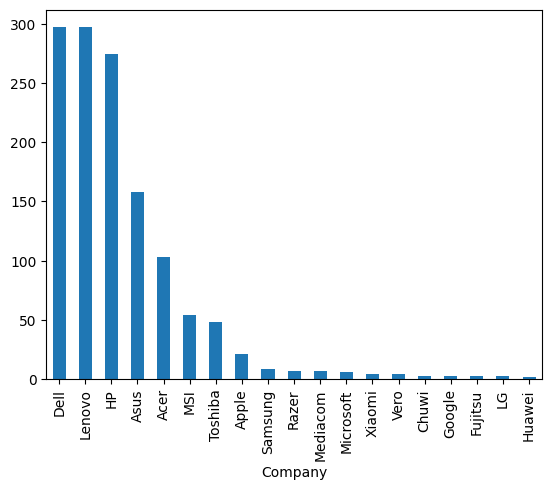

In [74]:
## Here we plot bar graph on the basis of company
data['Company'].value_counts().plot(kind='bar')

<Axes: xlabel='TypeName'>

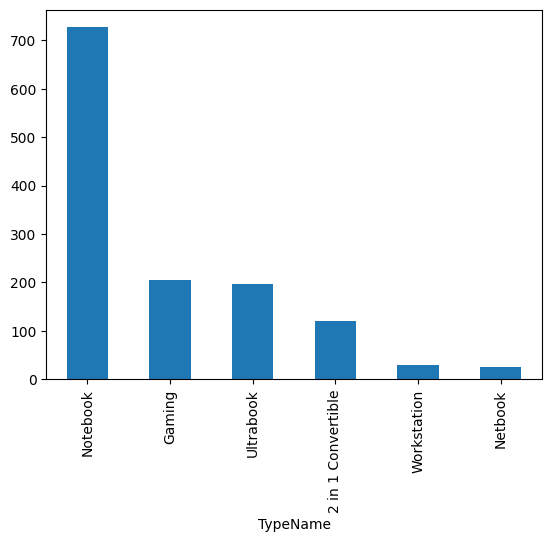

In [75]:
## Here we plot bar graph on the basis of TypeName
data['TypeName'].value_counts().plot(kind='bar')

<Axes: xlabel='OpSys'>

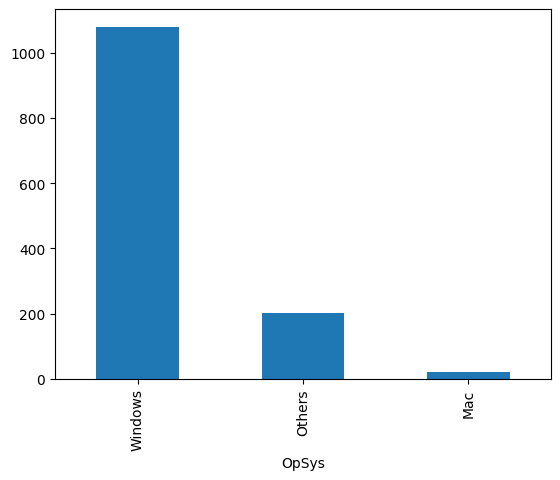

In [76]:
## Here we plot bar graph on the basis of OpSys
data['OpSys'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram'>

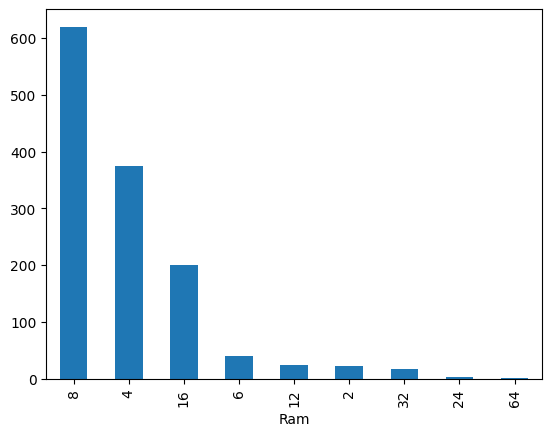

In [77]:
## Here we plot bar graph on the basis of Ram
data['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Inches'>

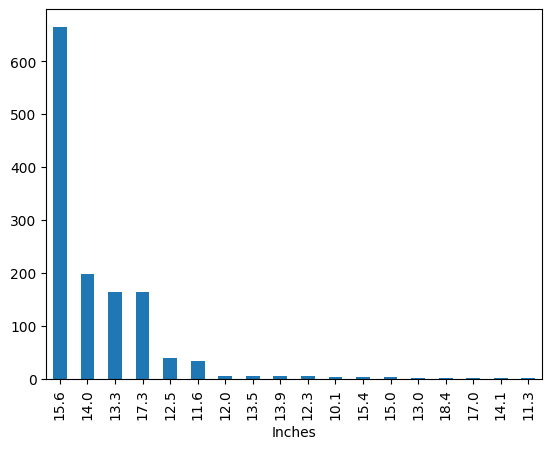

In [78]:
## Here we plot bar graph on the basis of Inches
data['Inches'].value_counts().plot(kind='bar')

<Axes: xlabel='Weight'>

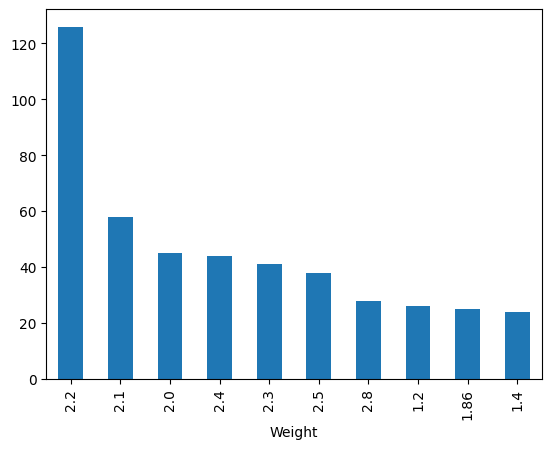

In [79]:
## Here we plot bar graph on the basis of weight and show only 10 largest value
data['Weight'].value_counts().nlargest(10).plot(kind='bar')

In [80]:
## Here we take all the numercal column using select_dtypes and store in heat_data
heat_data = data.select_dtypes(include='number')


In [81]:
## here we find cor-relation of price with other variable in descending order
heat_data.corr()["Price"].sort_values(ascending=False)

Price             1.000000
Ram               0.743007
x_res             0.556529
y_res             0.552809
SSD_storage_GB    0.547100
Clock-speed       0.430293
IPS Panel         0.252208
Weight            0.210370
Full HD           0.198612
Touchscreen       0.191226
Inches            0.068197
HDD_storage_TB   -0.026628
HD Graphics      -0.204375
HDD_storage_GB   -0.234620
Name: Price, dtype: float64

<Axes: >

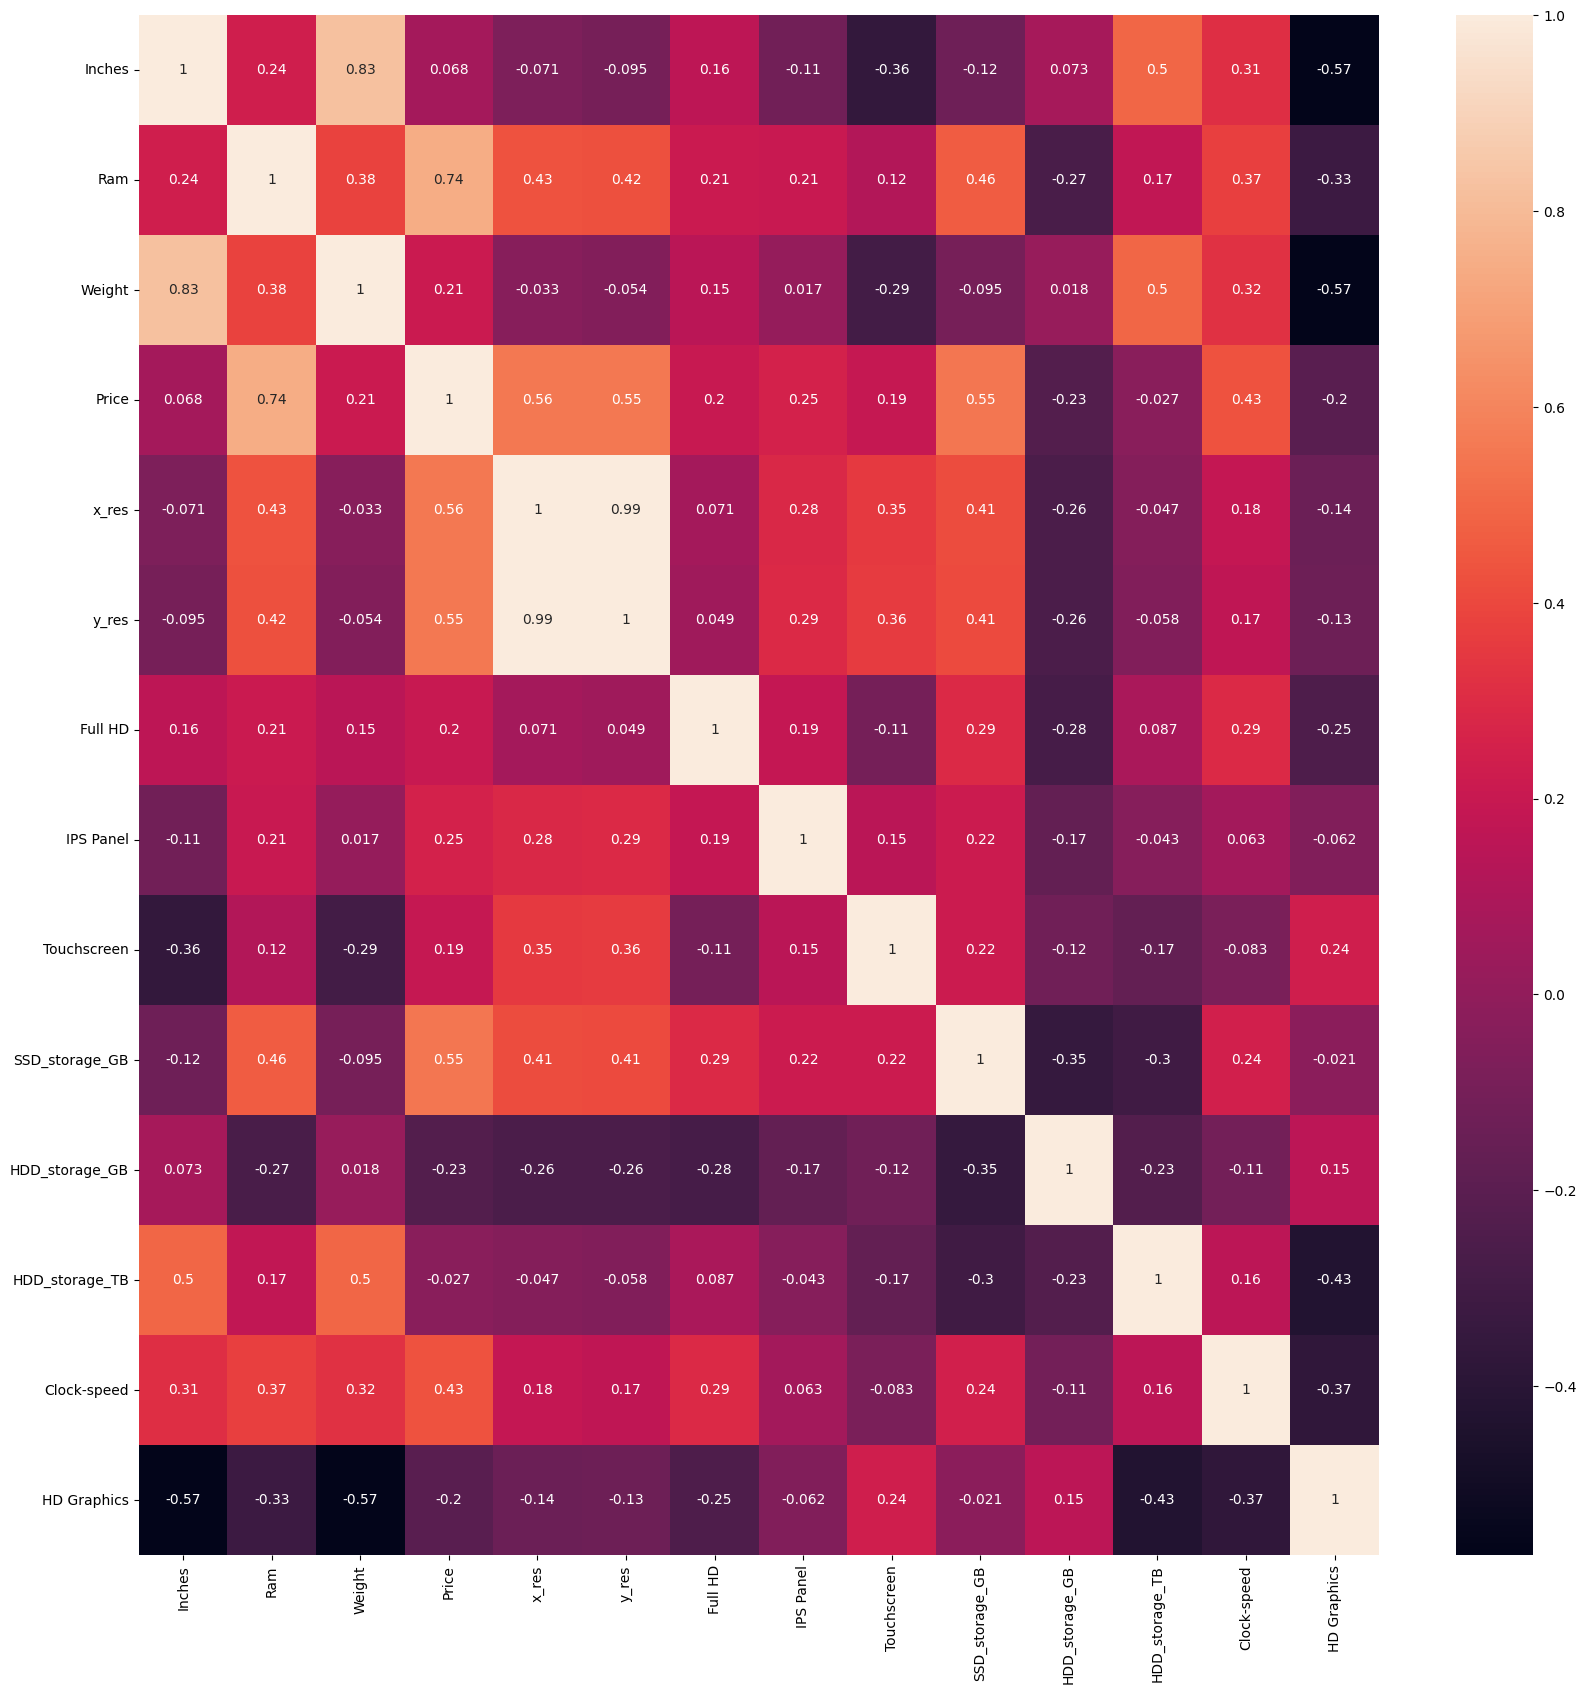

In [82]:
## Draw the heat map for checking the dependency of one variable on the other variable
plt.figure(figsize=(20,20))
sng.heatmap(heat_data.corr(),annot=True)

#sng.pairplot(data[:10])

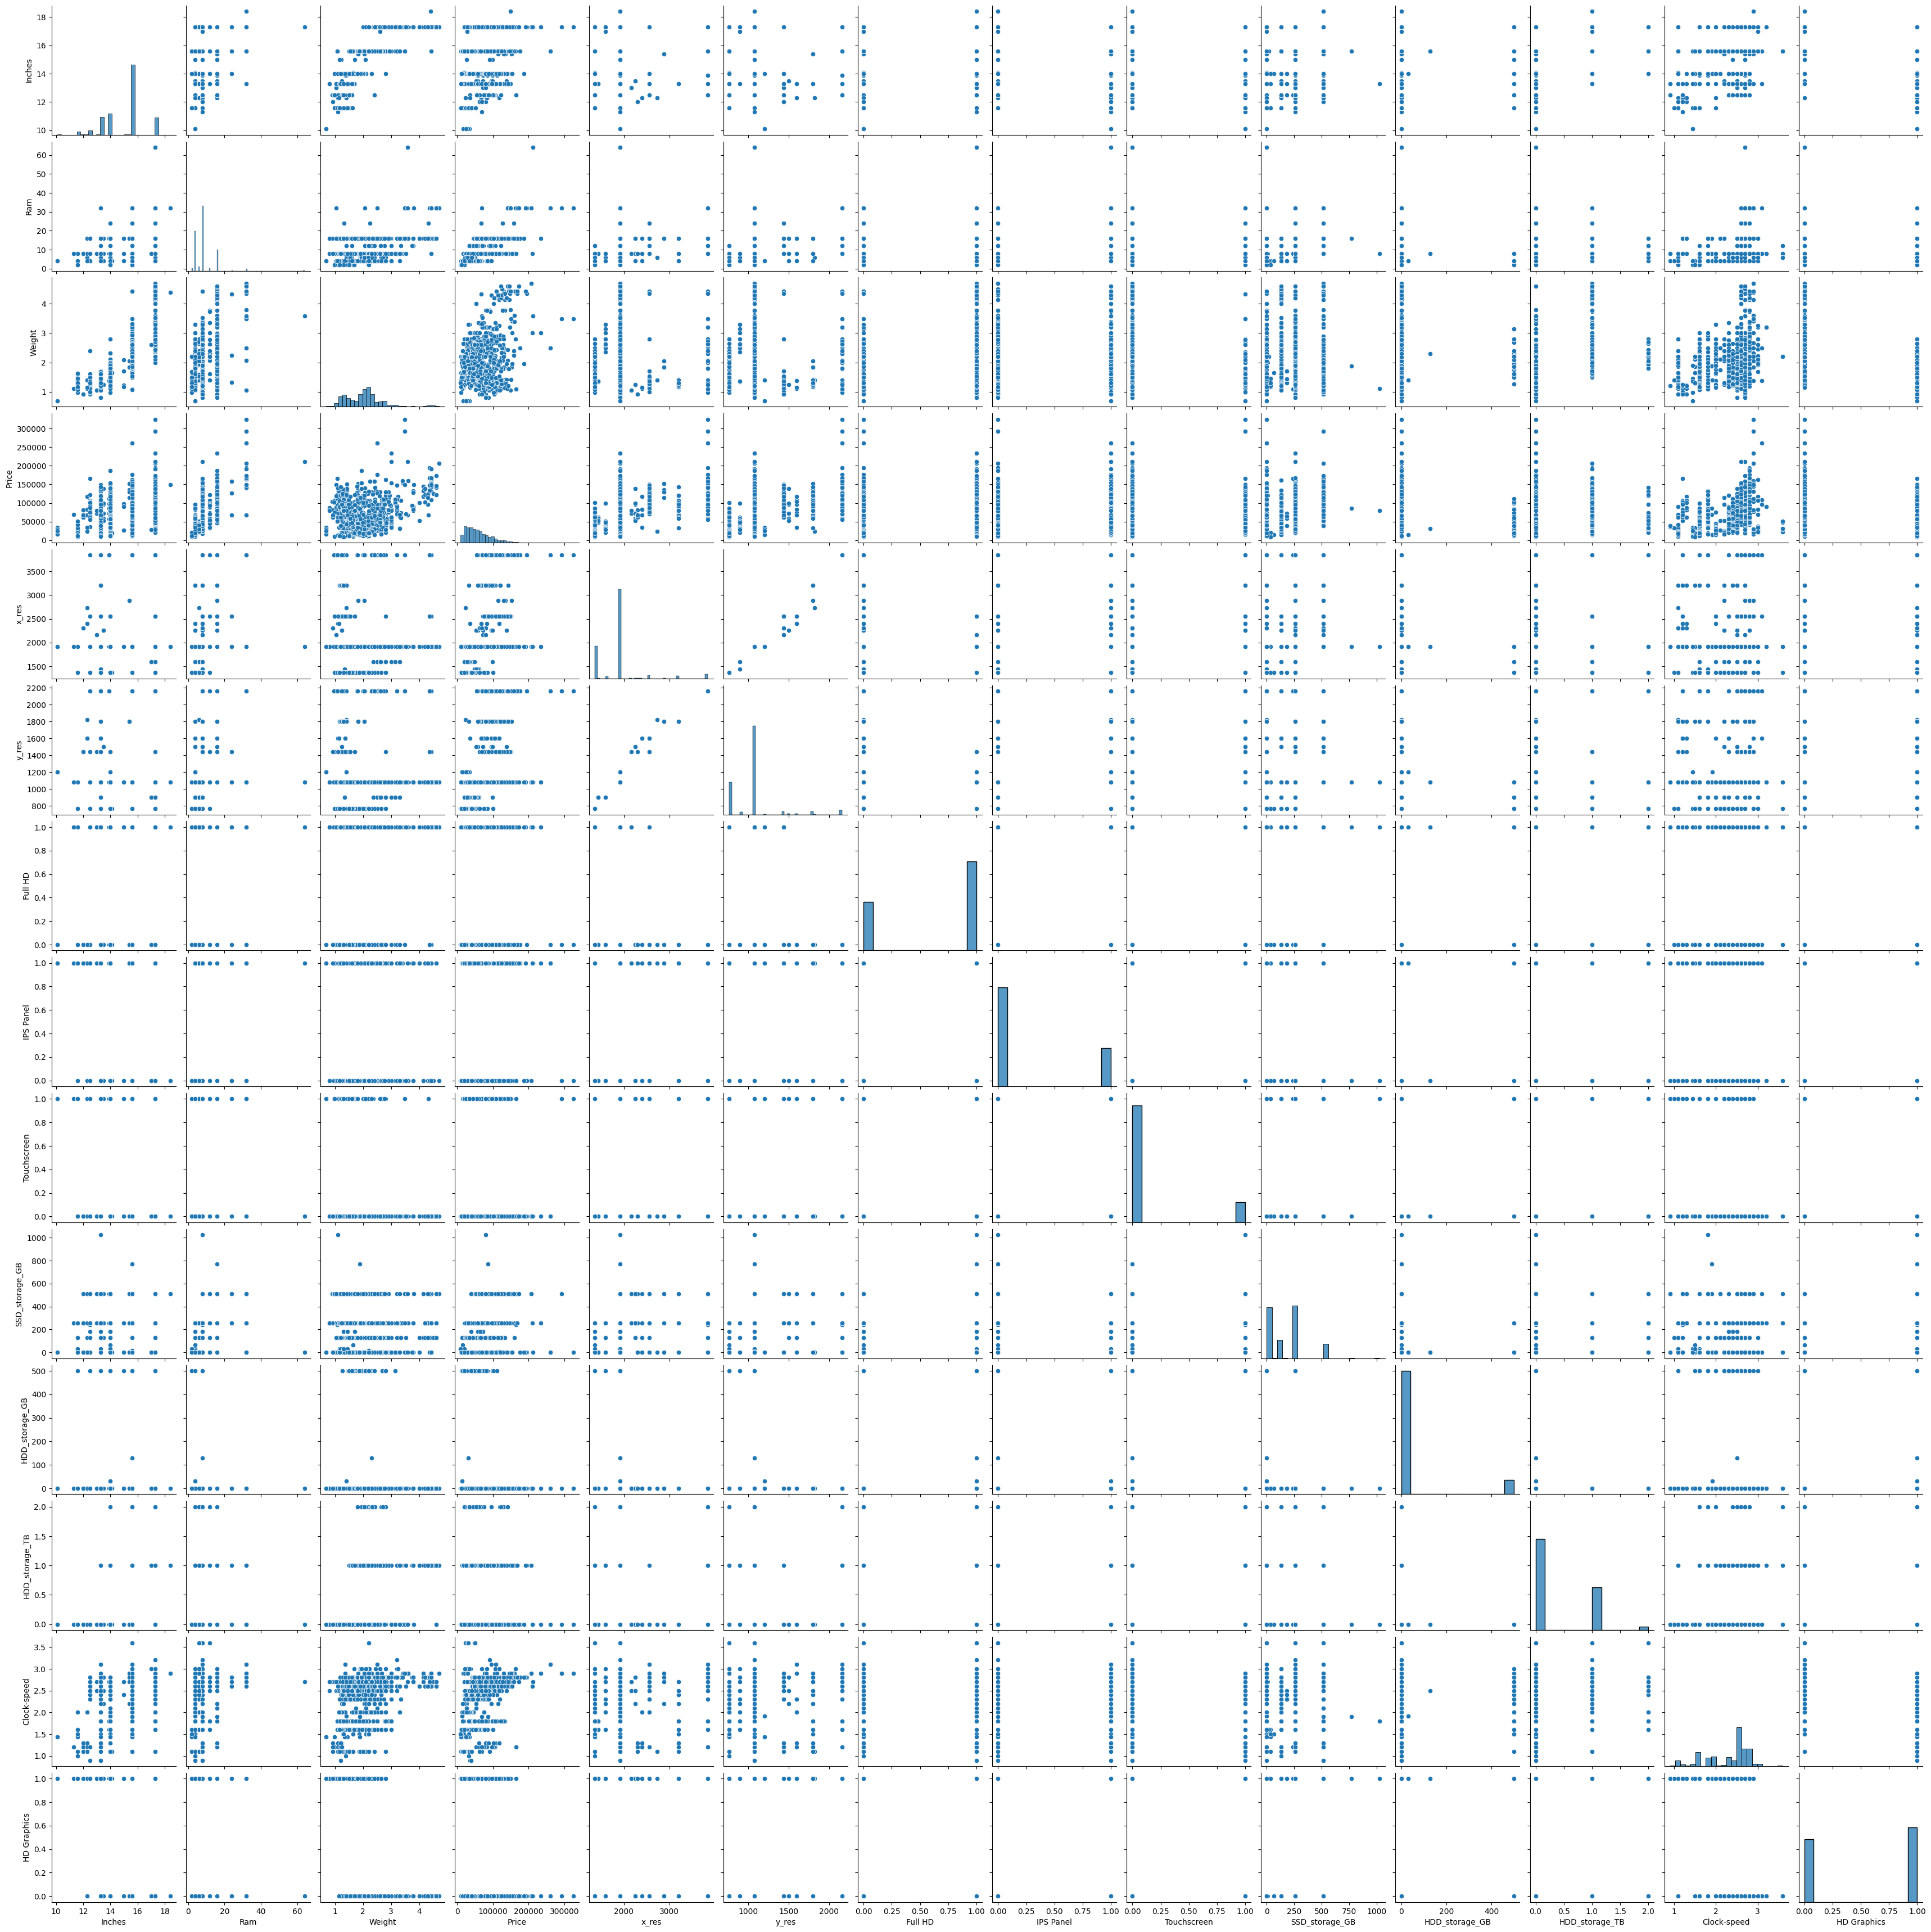

In [83]:
## Here we draw the pair plot and save into system name as output.png
output=sng.pairplot(data)
output.savefig('output.png')
output

<Axes: >

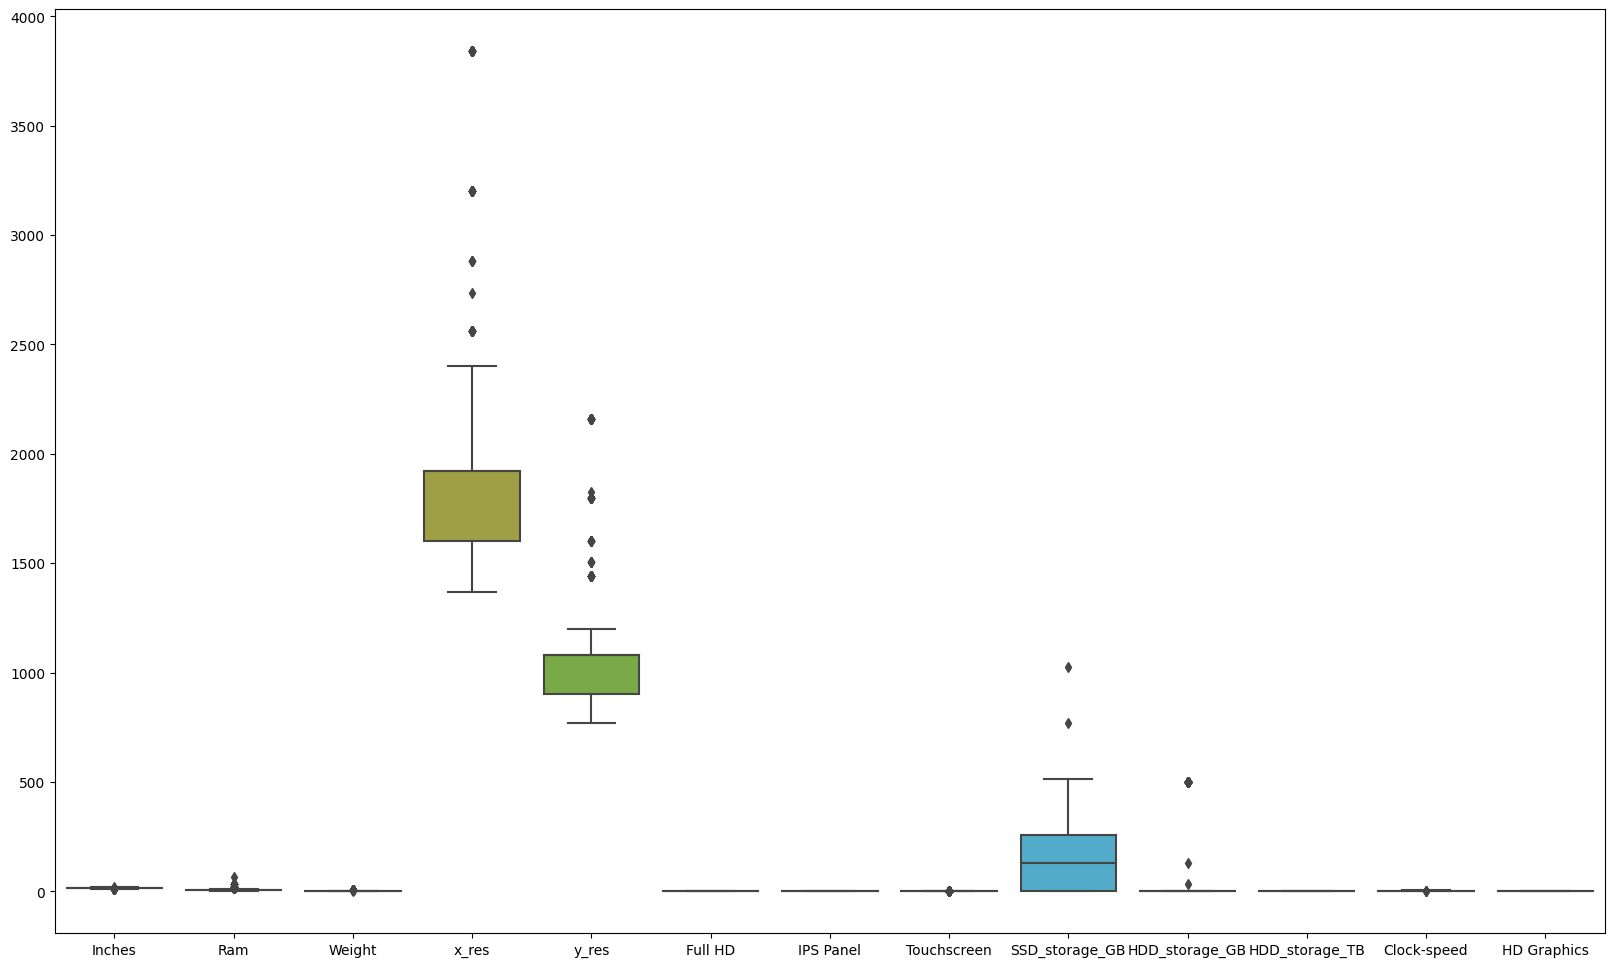

In [94]:
## Here we draw the pair plot and save into system name as output.png
plt.figure(figsize=(20,12))
boxplot=sng.boxplot(data.drop(columns=['Price']))
boxplot

<Axes: >

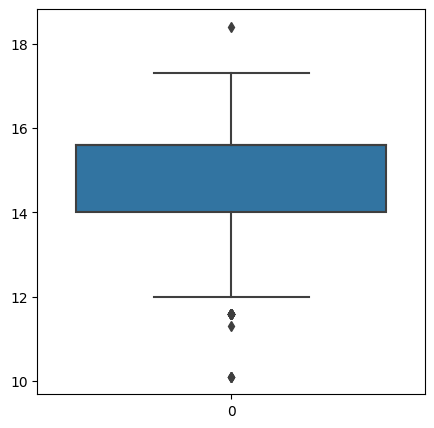

In [156]:
## Here we draw the pair plot and save into system name as output.png
plt.figure(figsize=(5,5))
boxplot=sng.boxplot(data['Inches'])
boxplot

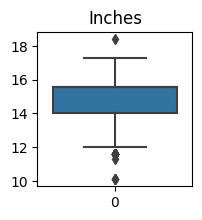

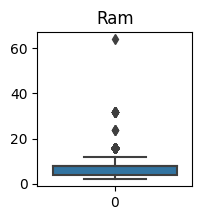

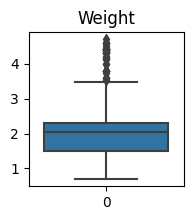

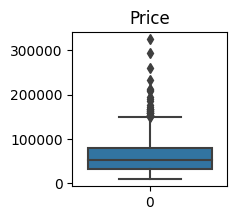

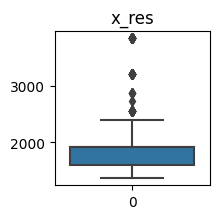

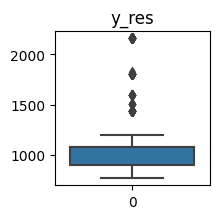

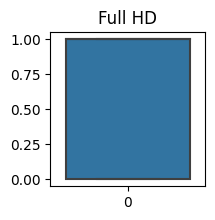

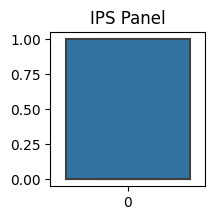

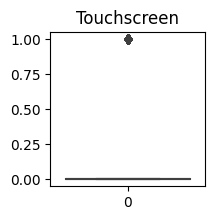

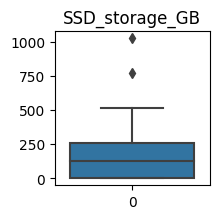

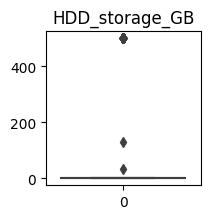

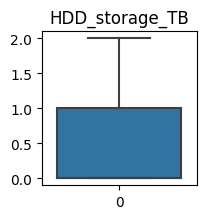

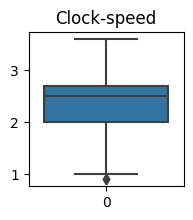

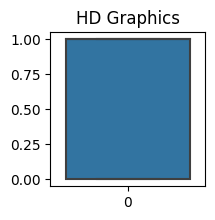

In [165]:
for i in heat_data.columns:
    ## Here we draw the pair plot and save into system name as output.png
    plt.figure(figsize=(2,2))
    boxplot=sng.boxplot(data[i])
    plt.title(i)
    boxplot

<Axes: >

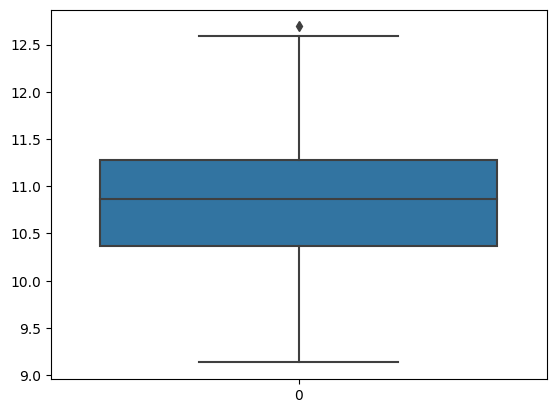

In [168]:
x=np.log(data['Price'])
sng.boxplot(x)

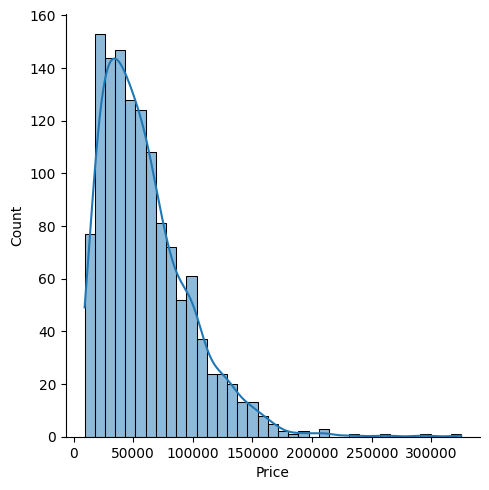

In [169]:

sng.displot(data['Price'],kde=True)

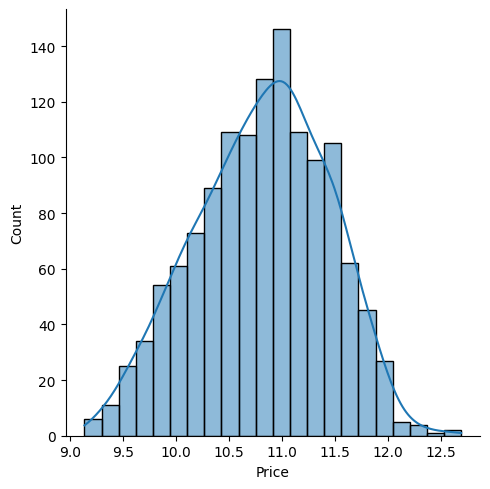

In [170]:
sng.displot(np.log(data['Price']),kde=True)

# Model Train

In [95]:
x=data.drop(columns='Price')
y=np.log(data['Price'])

In [96]:
x,y

(     Company            TypeName  Inches  Ram    OpSys  Weight  x_res  y_res  \
 0      Apple           Ultrabook    13.3    8      Mac    1.37   2560   1600   
 1      Apple           Ultrabook    13.3    8      Mac    1.34   1440    900   
 2         HP            Notebook    15.6    8   Others    1.86   1920   1080   
 3      Apple           Ultrabook    15.4   16      Mac    1.83   2880   1800   
 4      Apple           Ultrabook    13.3    8      Mac    1.37   2560   1600   
 ...      ...                 ...     ...  ...      ...     ...    ...    ...   
 1298  Lenovo  2 in 1 Convertible    14.0    4  Windows    1.80   1920   1080   
 1299  Lenovo  2 in 1 Convertible    13.3   16  Windows    1.30   3200   1800   
 1300  Lenovo            Notebook    14.0    2  Windows    1.50   1366    768   
 1301      HP            Notebook    15.6    6  Windows    2.19   1366    768   
 1302    Asus            Notebook    15.6    4  Windows    2.20   1366    768   
 
       Full HD  IPS Panel 

In [97]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder on the categorical data
encoder.fit(x)

# Transform the categorical data into one-hot encoded features
x = encoder.transform(x)






In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

# Linear Regression

In [99]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [100]:
pred=lr_model.predict(x_test)
pred.shape

(391,)

In [101]:
y_test.shape

(391,)

In [102]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,pred)
print('MEAN SQUARED ERROR :-',error)


from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred)
print('R2_SCORE :-',r2_score)

MEAN SQUARED ERROR :- 0.05701414189767186
R2_SCORE :- 0.8385214305461977


# Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [104]:
pred=rfr.predict(x_test)
pred.shape

(391,)

In [105]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,pred)
print('MEAN SQUARED ERROR :-',error)


from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred)
print('R2_SCORE :-',r2_score)

MEAN SQUARED ERROR :- 0.04369703349281189
R2_SCORE :- 0.8762388729719304


# SVM

In [106]:
from sklearn.svm import SVR
svm=SVR()
svm.fit(x_train,y_train)

SVR()

In [107]:
pred=svm.predict(x_test)

In [108]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score=r2_score(pred,y_test)
error=mean_squared_error(pred,y_test)

print('MEAN SQUARED ERROR :-',error)
print('R2_SCORE :-',r2_score)

MEAN SQUARED ERROR :- 0.03413584937733378
R2_SCORE :- 0.8837276923620252


# Polynomial Regression

In [109]:
from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(degree=3)
x_pol=pol.fit_transform(x_train)
pol_linear=LinearRegression()
pol_linear.fit(x_pol,y_train)

LinearRegression()

In [110]:
xt_pol=pol.fit_transform(x_test)
pred=pol_linear.predict(xt_pol)

In [111]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score=r2_score(pred,y_test)
error=mean_squared_error(pred,y_test)

print('MEAN SQUARED ERROR :-',error)
print('R2_SCORE :-',r2_score)

MEAN SQUARED ERROR :- 0.03924031109429557
R2_SCORE :- 0.8786321714717776


# Xgboost

In [112]:
from xgboost import XGBRegressor

rfr = XGBRegressor()
rfr.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [113]:
pred=rfr.predict(x_test)
pred.shape

(391,)

In [114]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,pred)
print('MEAN SQUARED ERROR :-',error)


from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred)
print('R2_SCORE :-',r2_score)

MEAN SQUARED ERROR :- 0.041245023837395194
R2_SCORE :- 0.8831835887611155


#   GradientBoostingRegressor

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [116]:
pred=gbr.predict(x_test)
pred.shape

(391,)

In [117]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,pred)
print('MEAN SQUARED ERROR :-',error)


from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred)
print('R2_SCORE :-',r2_score)

MEAN SQUARED ERROR :- 0.04822041184156002
R2_SCORE :- 0.8634275135347382


In [118]:
from sklearn.ensemble import AdaBoostRegressor
ar = AdaBoostRegressor()
ar.fit(x_train, y_train)

AdaBoostRegressor()

In [119]:
pred=ar.predict(x_test)
pred.shape

(391,)

In [120]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,pred)
print('MEAN SQUARED ERROR :-',error)


from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred)
print('R2_SCORE :-',r2_score)

MEAN SQUARED ERROR :- 0.09003268659249353
R2_SCORE :- 0.7450045032488325


In [121]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)

ExtraTreesRegressor()

In [122]:
pred=etr.predict(x_test)
pred.shape

(391,)

In [123]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,pred)
print('MEAN SQUARED ERROR :-',error)


from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred)
print('R2_SCORE :-',r2_score)

MEAN SQUARED ERROR :- 0.07448552768369968
R2_SCORE :- 0.789038016621161


# knn

In [124]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [125]:
pred=knn.predict(x_test)

In [126]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,pred)
print('MEAN SQUARED ERROR :-',error)


from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred)
print('R2_SCORE :-',r2_score)

MEAN SQUARED ERROR :- 0.04811615608953972
R2_SCORE :- 0.8637227923749211


In [127]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
r=Ridge()
r.fit(x_train,y_train)

Ridge()

In [128]:
pred=r.predict(x_test)

In [129]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,pred)
print('MEAN SQUARED ERROR :-',error)


from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred)
print('R2_SCORE :-',r2_score)

MEAN SQUARED ERROR :- 0.04458338971334656
R2_SCORE :- 0.8737284864300212


In [130]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
l=Lasso()
l.fit(x_train,y_train)

Lasso()

In [131]:
pred=l.predict(x_test)

In [132]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,pred)
print('MEAN SQUARED ERROR :-',error)


from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred)
print('R2_SCORE :-',r2_score)

MEAN SQUARED ERROR :- 0.35328184337603635
R2_SCORE :- -0.0005841495387675089


In [134]:
data.head(1)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,x_res,y_res,Full HD,IPS Panel,Touchscreen,SSD_storage_GB,HDD_storage_GB,HDD_storage_TB,Clock-speed,Processor,HD Graphics,design
0,Apple,Ultrabook,13.3,8,Mac,1.37,71378.6832,2560,1600,0,1,0,128,0,0.0,2.3,Intel Core i5,0,Graphics


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1303 non-null   object 
 1   TypeName        1303 non-null   object 
 2   Inches          1303 non-null   float64
 3   Ram             1303 non-null   int32  
 4   OpSys           1303 non-null   object 
 5   Weight          1303 non-null   float64
 6   Price           1303 non-null   float64
 7   x_res           1303 non-null   int32  
 8   y_res           1303 non-null   int32  
 9   Full HD         1303 non-null   int64  
 10  IPS Panel       1303 non-null   int64  
 11  Touchscreen     1303 non-null   int64  
 12  SSD_storage_GB  1303 non-null   int32  
 13  HDD_storage_GB  1303 non-null   int32  
 14  HDD_storage_TB  1303 non-null   float64
 15  Clock-speed     1303 non-null   float64
 16  Processor       1303 non-null   object 
 17  HD Graphics     1303 non-null   i

In [136]:
x=data.drop(columns='Price')
y=np.log(data['Price'])

In [137]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [138]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Step 1: Apply one-hot encoding to specific columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 4, 15, 17])
], remainder='passthrough')

# Step 2: Create a xgboost Regression model
from xgboost import XGBRegressor
step2 = XGBRegressor()

# Create a pipeline by combining step1 and step2
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])




In [139]:
# Fit the pipeline to the training data
pipe.fit(x_train, y_train)



Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 4, 15, 17])])),
                ('step2',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [140]:
# Use the pipeline to make predictions on the test data
pred = pipe.predict(x_test)

In [141]:
pred

array([10.5138645,  9.721865 , 11.645525 , 10.827818 , 11.63154  ,
       10.6617775, 11.0053005, 11.334093 ,  9.781874 , 10.961412 ,
       10.252207 , 11.0552845, 11.456484 , 11.370209 , 11.084501 ,
       10.848731 , 11.127267 , 11.098779 , 10.084187 , 10.6433115,
       11.594867 , 11.580503 ,  9.567889 , 10.330951 , 10.393493 ,
       11.61744  , 10.755352 , 10.08873  , 10.3298435, 10.8633375,
       10.367001 ,  9.508856 ,  9.407735 , 10.909472 , 11.222584 ,
       10.20991  , 11.293092 , 10.821823 , 10.889191 , 11.853289 ,
       11.35654  , 10.558852 , 10.631492 , 11.467989 , 11.242822 ,
       10.189453 , 10.799146 , 10.174221 ,  9.933295 ,  9.844561 ,
       11.050349 , 10.104907 , 11.3333025, 11.208906 , 11.505546 ,
       10.777183 , 11.48358  , 10.796058 , 10.182769 , 11.727355 ,
       11.207018 , 11.92998  ,  9.845741 , 11.203019 , 10.907635 ,
       11.488823 ,  9.965061 ,  9.8901   , 10.659718 , 11.429261 ,
       10.914659 , 10.670865 , 10.578652 ,  9.898559 , 11.4076

In [142]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,pred)
print('MEAN SQUARED ERROR :-',error)


from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred)
print('R2_SCORE :-',r2_score)

MEAN SQUARED ERROR :- 0.032956959793211296
R2_SCORE :- 0.906657496827615


# Exporting the model

In [143]:
import pickle
pickle.dump(data,open('data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1303 non-null   object 
 1   TypeName        1303 non-null   object 
 2   Inches          1303 non-null   float64
 3   Ram             1303 non-null   int32  
 4   OpSys           1303 non-null   object 
 5   Weight          1303 non-null   float64
 6   Price           1303 non-null   float64
 7   x_res           1303 non-null   int32  
 8   y_res           1303 non-null   int32  
 9   Full HD         1303 non-null   int64  
 10  IPS Panel       1303 non-null   int64  
 11  Touchscreen     1303 non-null   int64  
 12  SSD_storage_GB  1303 non-null   int32  
 13  HDD_storage_GB  1303 non-null   int32  
 14  HDD_storage_TB  1303 non-null   float64
 15  Clock-speed     1303 non-null   float64
 16  Processor       1303 non-null   object 
 17  HD Graphics     1303 non-null   i

In [145]:
x_train.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,x_res,y_res,Full HD,IPS Panel,Touchscreen,SSD_storage_GB,HDD_storage_GB,HDD_storage_TB,Clock-speed,Processor,HD Graphics,design
1,Apple,Ultrabook,13.3,8,Mac,1.34,1440,900,0,0,0,0,0,0.0,1.8,Intel Core i5,1,Graphics
659,Dell,Gaming,17.3,32,Windows,4.42,3840,2160,0,1,0,512,0,1.0,2.8,Intel Core i7,0,GTX
776,Lenovo,Notebook,15.6,16,Others,2.50,3840,2160,0,0,0,512,0,0.0,2.7,Intel Core i7,0,Quadro
740,Dell,Notebook,15.6,8,Windows,2.00,1920,1080,1,0,0,128,0,1.0,2.7,Intel Core i7,0,GeForce
1135,Lenovo,Notebook,15.6,16,Windows,2.50,1920,1080,1,0,0,0,0,0.0,2.5,Intel Core i7,0,Other Design


In [146]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 1 to 1192
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         912 non-null    object 
 1   TypeName        912 non-null    object 
 2   Inches          912 non-null    float64
 3   Ram             912 non-null    int32  
 4   OpSys           912 non-null    object 
 5   Weight          912 non-null    float64
 6   x_res           912 non-null    int32  
 7   y_res           912 non-null    int32  
 8   Full HD         912 non-null    int64  
 9   IPS Panel       912 non-null    int64  
 10  Touchscreen     912 non-null    int64  
 11  SSD_storage_GB  912 non-null    int32  
 12  HDD_storage_GB  912 non-null    int32  
 13  HDD_storage_TB  912 non-null    float64
 14  Clock-speed     912 non-null    float64
 15  Processor       912 non-null    object 
 16  HD Graphics     912 non-null    int64  
 17  design          912 non-null    object 

In [147]:
x=data.drop(columns='Price')
y=np.log(data['Price'])

In [148]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [149]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Step 1: Apply one-hot encoding to specific columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 4, 15, 17])
], remainder='passthrough')

# Step 2: Create a xgboost Regression model
from sklearn.svm import SVR
step2=SVR(kernel='rbf',C=10000,epsilon=0.1)

# Create a pipeline by combining step1 and step2
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])




In [150]:
# Fit the pipeline to the training data
pipe.fit(x_train, y_train)



Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 4, 15, 17])])),
                ('step2', SVR(C=10000))])

In [151]:
# Use the pipeline to make predictions on the test data
pred = pipe.predict(x_test)

In [152]:
pred

array([10.52553926, 10.03020961, 11.54995509, 10.91326117, 11.52550184,
       10.62798687, 10.9746316 , 10.92272927, 10.09235088, 11.09125313,
       10.28124714, 10.99906782, 11.42571023, 10.99118841, 10.87686797,
       11.20750381, 11.06915563, 11.13653823, 10.13256208, 10.90073102,
       11.67538869, 11.46485602,  9.8108546 , 10.32501654, 10.29392023,
       11.6690414 , 11.02019928, 10.34099919, 10.21238977, 10.37204493,
       10.19087869,  9.88858039,  9.54617601, 10.7162009 , 11.42917991,
       10.28238509, 10.99450882, 10.4034538 , 10.89006222, 11.56974666,
       11.15283608, 10.38841004, 10.69495257, 11.72427402, 11.42739291,
       10.03384102, 11.02760861, 10.30888453, 10.08581841, 10.0427739 ,
       10.93717274,  9.93556008, 11.08827997, 10.9392754 , 11.1073214 ,
       10.90493511, 11.4250077 , 10.82014885, 10.02393193, 11.46969606,
       10.93813286, 11.77928132,  9.85788503, 11.06839063, 10.68313425,
       11.3830368 , 10.07373302,  9.84850932, 10.63065296, 11.16

In [153]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_test,pred)
print('MEAN SQUARED ERROR :-',error)


from sklearn.metrics import r2_score
r2_score=r2_score(y_test,pred)
print('R2_SCORE :-',r2_score)

MEAN SQUARED ERROR :- 0.06767696366960511
R2_SCORE :- 0.8083216038231553


In [154]:
import pickle
pickle.dump(data,open('data2.pkl','wb'))
pickle.dump(pipe,open('pipe2.pkl','wb'))
